In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")


Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()




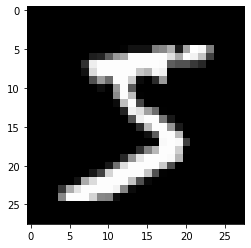

In [4]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0], cmap='gray')

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

2021-10-31 14:43:14.399933: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-10-31 14:43:15.340572: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1875/1875 [==============================] - 14s 2ms/step - loss: 0.2097 - accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0843 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0590 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0467 - accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0350 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0315 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0256 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0180 - accura

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0621 - accuracy: 0.9849


[0.06207850202918053, 0.9848999977111816]

2


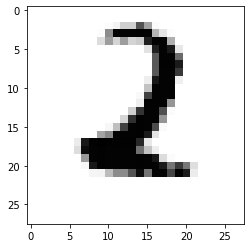

In [12]:
image_index = 4442
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())